In [1]:
import math
import scipy.integrate as integrate
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.ndimage import gaussian_filter
from numpy import e, pi
from scipy import constants
#plt.rcParams.update({'font.size': 16})

In [2]:
hbar=6.582e-16
boltz=8.6173e-5

Rq=25800
#Ll=5e-8
#Cl=5e-16
Rl=377
ws=1
Q=50
wc=Q*ws
#wc=1/(Rl*Cl)
Q=wc/ws
tcap=5e-16;

temper = 0.5;
beta=1/(temper*ws*hbar);#temperature goes here


wx = np.arange(-ws*5+(ws/100),ws*5+(ws/100),(ws/1000))
centwx=len(wx)/2;
Ex=hbar*wx;
dw=ws/1000;
Z=(Rl)*(1+1j*Q**2*(wx/wc))/(1+1j*wx/wc-(Q**2)*(wx/wc)**2)
#Zt=1./(1i.*wx.*tcap+1./Z)
Zt=Z;
#figure
#plot(Ex,real(Zt))
Z0=(Rl)*(1+1j*Q**2*(0/wc))/(1+1j*0/wc-(Q**2)*(0/wc)**2)
D=(np.pi/beta)*Z0.real/Rq #a beta term was removed, possibly typo is Ast paper
I=(1/np.pi)*(D/(D**2+Ex**2))
kk=(Zt/Rq).real*(1/(1-np.exp(-beta*hbar*wx)))-(1/(beta*hbar*wx))*((Z0).real/Rq)


In [3]:
wx=np.arange(-4e12+.5e9,4e12+.5e9,1e9)
# we need to evaluate the sum over Matsubara frequencies first for a given
# number of w values.  Thus, to run this you need to change wx above first
def ZZ(w):
    return (Rl)*(1+1j*Q**2*(w/wc))/(1+1j*w/wc-(Q**2)*(w/wc)**2)
#ZZ=@(w) (Rl).*(1+1i.*Q.^2.*(w./wc))./(1+1i.*w/wc-(Q.^2).*(w./wc).^2)
#ZZt=@(w) 1./(1i.*w.*tcap+1./ZZ(w))
ZZt=ZZ;
#yms nn;
#vn = 2.*nn*pi./(beta*hbar);
#kapr=(2./(beta*hbar)).* vpasum((vn./(vn.^2+wx.^2)).*ZZt(-1i.*vn),1,100) 
sumlist=[]
for nn in range(100):
    vn=2*nn*np.pi/(beta*hbar)
    sumlist.append((vn/(vn**2+wx**2))*ZZt(-1j*vn))
kapr=(2/(beta*hbar))*np.sum(sumlist)
wx = np.arange(-ws*5+(ws/100),ws*5+(ws/100),(ws/1000))
kappa=((Zt).imag*(1/(1-np.exp(-beta*hbar*wx)))-kapr)*(1/Rq);

In [67]:
(np.outer(np.matrix(hbar*Ex/(D**2+Ex**2)),kk)).size

100000000

In [73]:
x = np.matrix(np.arange(12).reshape((3,4)))
z = x - 1j*x; z

matrix([[ 0. +0.j,  1. -1.j,  2. -2.j,  3. -3.j],
        [ 4. -4.j,  5. -5.j,  6. -6.j,  7. -7.j],
        [ 8. -8.j,  9. -9.j, 10.-10.j, 11.-11.j]])

In [126]:
xx = (hbar*Ex/(D**2+Ex**2))

In [127]:
xx

array([-0.20040076, -0.20044093, -0.20048111, ...,  0.19972035,
        0.19968047,  0.1996406 ])

In [128]:
np.matrix(xx)

matrix([[-0.20040076, -0.20044093, -0.20048111, ...,  0.19972035,
          0.19968047,  0.1996406 ]])

In [76]:
z.getH()

matrix([[ 0. -0.j,  4. +4.j,  8. +8.j],
        [ 1. +1.j,  5. +5.j,  9. +9.j],
        [ 2. +2.j,  6. +6.j, 10.+10.j],
        [ 3. +3.j,  7. +7.j, 11.+11.j]])

In [111]:
np.asmatrix(kk)

matrix([[ 0.00014642,  0.00014645,  0.00014648, ..., -0.0001207 ,
         -0.00012069, -0.00012068]])

In [117]:
len(kk)

10000

In [125]:
len((np.outer(np.matrix(hbar*Ex/(D**2+Ex**2)).getH(),kk))[10000-1])

10000

In [134]:
Ps = np.roll(Pot,int(np.rint(sbk/2)+i-1))
np.matrix(Ps).getH()

matrix([[1.10597418e+16-0.j],
        [9.45462852e+15-0.j],
        [8.18361788e+15-0.j],
        ...,
        [1.95278121e+16-0.j],
        [1.58480896e+16-0.j],
        [1.31264510e+16-0.j]])

In [165]:
np.array([0,0], dtype=np.clongdouble)

array([0.+0.j, 0.+0.j], dtype=complex256)

In [166]:
np.array([,0]).dtype

dtype('int64')

In [168]:
np.clongdouble(0), float(0)

(0j, 0.0)

In [ ]:
###

# check douple(kappa)
# check .* vs *
# outer, matrix, getH()

# .* elememt by element and * matrix mult

In [27]:
#BK=np.outer(np.matrix(hbar*Ex/(D**2+Ex**2)).getH(),kk) + np.outer(np.matrix(hbar*D/(D**2+Ex**2)).getH(),kappa)
BK=np.outer((hbar*Ex/(D**2+Ex**2)).conjugate(),kk) + np.outer((hbar*D/(D**2+Ex**2)).conjugate(),kappa)
newBK1=BK;
Pot = np.zeros(sbk)
for j in range(2): # 12 and 17 and 22 and 27 and 32 and 37 
    Pzint = newBK1
    Pview = newBK1
    sbk = len(BK)
    if j/5==1 or j/5==2 or j/5==3 or j/5==4 or j/5==5:
        print(j)
    for i in range(sbk):
        #Pot=np.nansum(Pzint,1)+I 

        if j==0:
            shifter = Ex[i]-hbar*(wx)+hbar*dw/2
            sI = (1/np.pi)*(D/(D**2+shifter**2))
            Pzint[i,:] = BK[i,:]*sI*dw #newBK2
#             print("here 1")
#             print(Pzint)

        else:
            Ps = np.roll(Pot,int(np.rint(sbk/2)+i-1))
            #Pview[i,:] = np.matrix(Ps).getH()
            Pzint[i,:] = BK[i,:]*np.matrix(Ps).getH()*dw # newBK2
#             print("here 2")
#             print(Pzint)
            
            if i<np.rint(sbk/2):
                Pzint[i][int(np.rint(sbk/2)+i):sbk]=0
            elif i>np.rint(sbk/2):
                Pzint[i][1:i-int(np.rint(sbk/2))]=0
    print("iter",j) #,"Pzint",Pzint)
#     print("Pzint sum",np.sum(abs(Pzint)))
#     print("Pzint nansum dim = 0, 1",np.nansum(Pzint,0), np.nansum(Pzint,1))
#     print("I", np.sum(abs(I)))

#     Pot_temp = Pot
    Pot=np.nansum(Pzint,0)+I.conjugate()
#     assert Pot_temp.all() != Pot.all(), "woah, Pot_temp is the same as Pot"


iter 0
I 1.514854951942437e+18
iter 1
I 1.514854951942437e+18


In [24]:
np.nansum?

Text(0.5, 1.0, '18 iters, T=0.5')

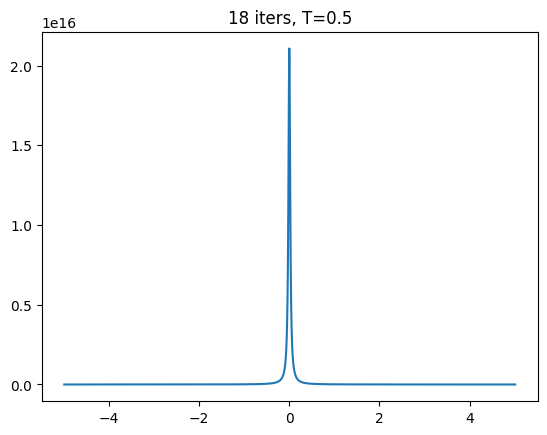

In [11]:
plt.plot(wx,Pot.real)
plt.title('18 iters, T=0.5')

Text(0.5, 1.0, '18 iters, T=0.5')

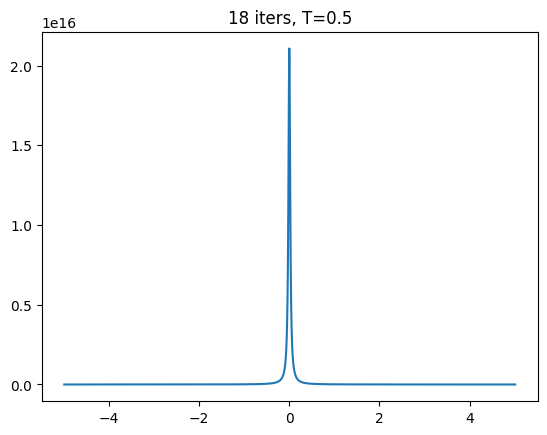

In [9]:
plt.plot(wx,Pot.real)
plt.title('18 iters, T=0.5')